DBMS: Data Management System
RDBMS: Relational Data Management System : MySQL, Oracle Database, IBM Db2 etc.

Cloud databases are available as 1. virtual machine or 2. Managed service 
and the database services can either be single or multi tenant 

entity: tables
attribute: columns



! 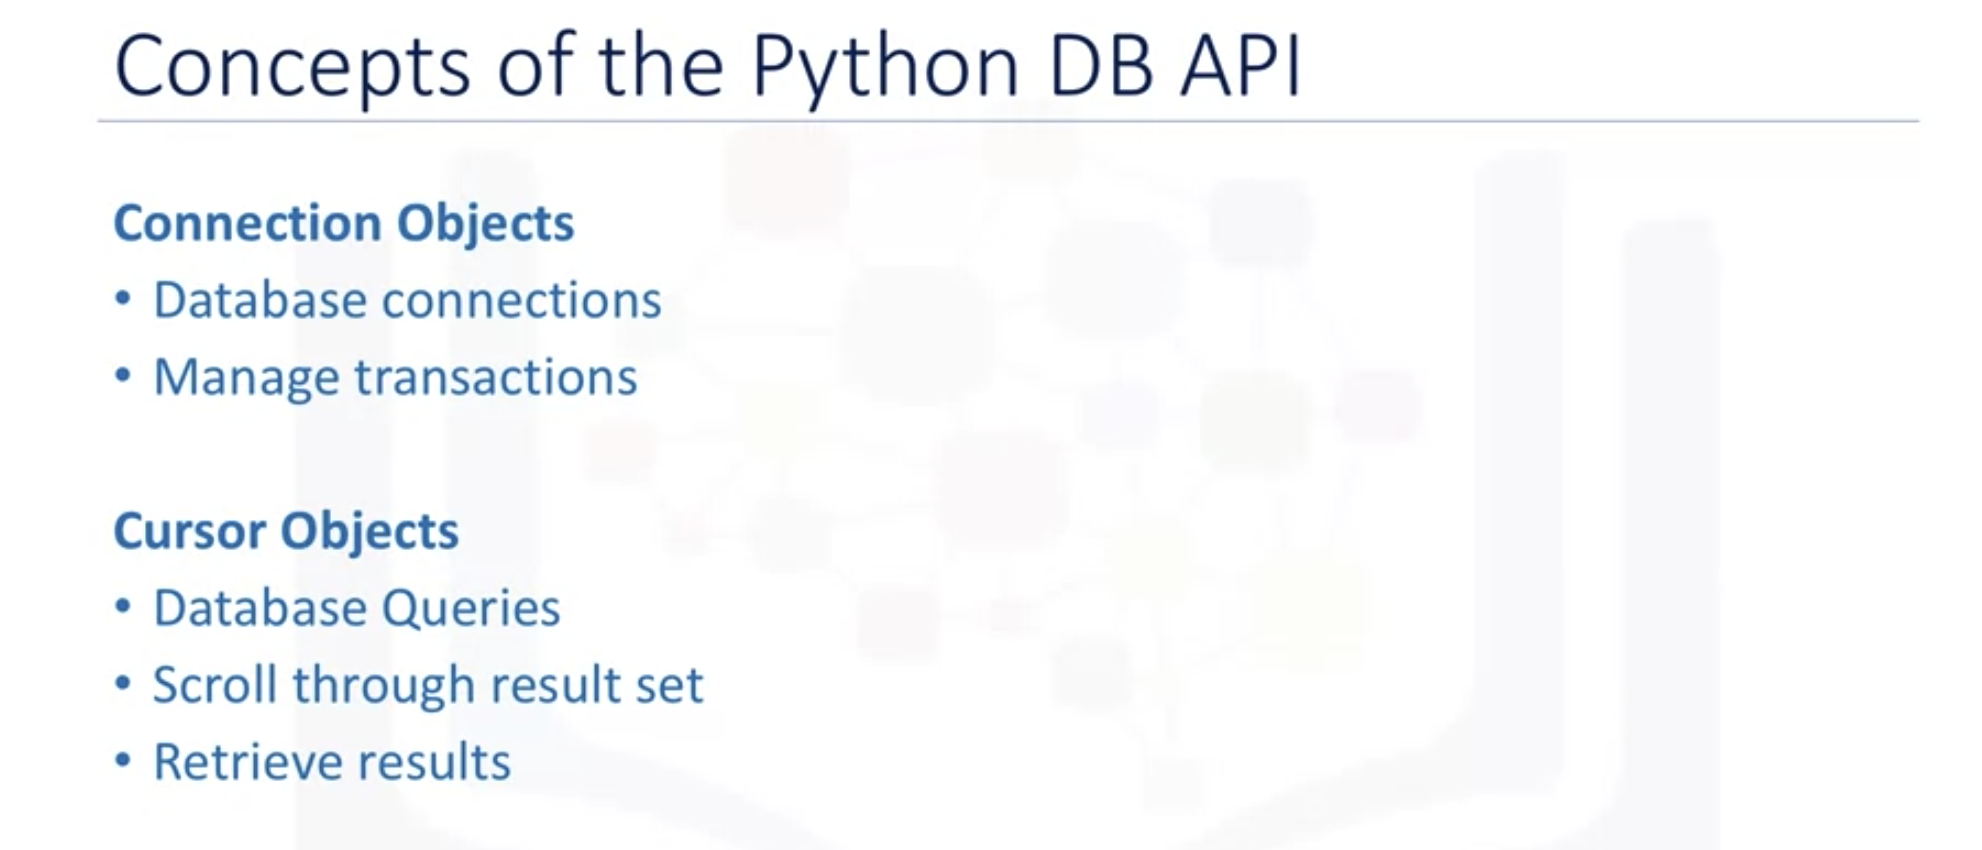 
! 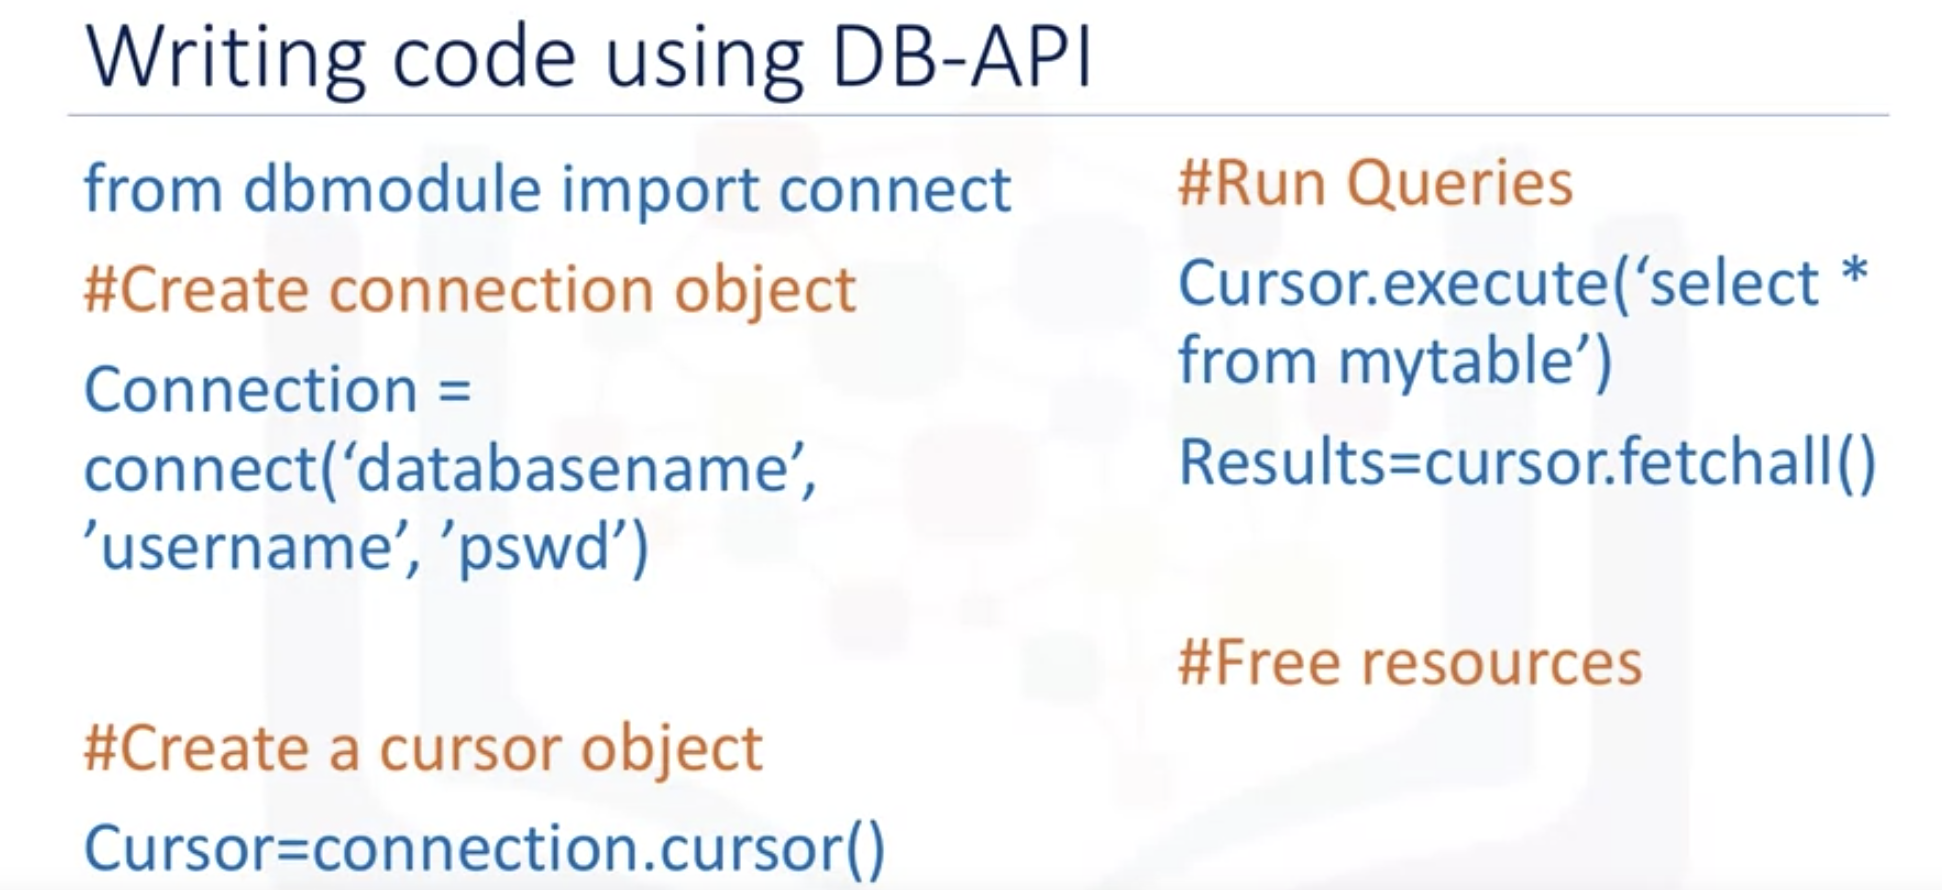


In [ ]:
OLAP: db optimized for complex analytics and ad hoc queries, including aggregations. optimized for select (read)
OLTP: db optimized for less complex queries in large volume. little aggregations. optimized for select (read),insert, update, delete

Normalization: to reduce data redundancy and increase data integrity
denormalization: sacrifice soem write performance for read performance.
                must be done in when doing read heavy workloads to increase performance
                When try to denormalize, we think abt the queries we are running and how we can reduce using JOINS
    
- First Normal Form (1NF):

Atomic values: each cell contains unique and single values
Be able to add data without altering tables
Separate different relations into different tables
Keep relationships between tables together with foreign keys

- Second Normal Form (2NF):

Have reached 1NF
All columns in the table must rely on the Primary Key

- Third Normal Form (3NF):

Must be in 2nd Normal Form
No transitive dependencies
transitive dependencies you are trying to maintain is that to get from A-> C, avoid going through B.

# POSTGRES


In [ ]:
# to install python wrapper to run postgreSQL queries
!pip3 install --user psycopg2

import psycopg2


# create the connection to the db
try:
    conn = psycopg2.connect('host=127.0.0.1 dbname=tudentdb user=student password=student')
except psycorpg2.Error as e:
    print('Error: Could not make connection to the Postgre database')
    print(e)
    
    # to close connection
    try:
        conn.close()
    except psycopg2.Error as e:
        print(e)
        
        
        
# get a cursor to execute queries
try:
    cur = conn.cursor()
except psycopg2.Error as e:
    print('Error: Could not get cursor to the database')
    print(e)
    
# each action will be commited automatically without needing to call conn.commit() after each command
conn.set_session(autocommit=True)

# execution
try:
    cur.execute('select * from udacity.music')  # music is the table name
except psycopg2.Error as e:
    print(e)
    
    
try:
    cur.execute('create database udacity')
except psycopg2.Error as e:
    print(e)
    
    
try:
    cur.execute('CREATE TABLE IF NOT EXISTS music_library(album_name varchar, artist_name varchar, year int, songs text[]);')
except psycopg2.Error as e:
    print('Error:issue creating table')
    print(e)
    
    
try:
    cur.execute('INSERT INTO music_library (album_name, artist_name, year, songs)
                VALUES (%s, %s, %s, %s)',
                ('Let It Be', 'The Beatles', 1970, ['Let is Be', 'Across']))
except psycopg2.Error as e:
    print('Error: Inserting Rows')
    print(e)
    
    
# validate the data inserted, not needed when using Postgre Shell
try:
    cur.execute('SELECT * FROM music_library;')
except psycopg2.Error as e:
    print('Error: select *')
    print(e)
row = cur.fetchone()
while row:
    print(row)
    row = cur.fetchone()
    

try:
    cur.execute('DROP table music_library')
except psycopg2.Error as e:
    print('Error: Dropping table')
    print(e)

# to disconnect
cur.close()
conn.close()




















# Apache Cassandra

### if you are trying to do analysis, such as using GROUP BY statements. Since Apache Cassandra requires data modeling based on the query you want, you can't do ad-hoc queries. However you can add clustering columns into your data model and create new tables.


##### When to use a NoSQL Database
##### Need to be able to store different data type formats: NoSQL was also created to handle different data configurations: structured, semi-structured, and unstructured data. JSON, XML documents can all be handled easily with NoSQL.
##### Large amounts of data: Relational Databases are not distributed databases and because of this they can only scale vertically by adding more storage in the machine itself. NoSQL databases were created to be able to be horizontally scalable. The more servers/systems you add to the database the more data that can be hosted with high availability and low latency (fast reads and writes).
##### Need horizontal scalability: Horizontal scalability is the ability to add more machines or nodes to a system to increase performance and space for data
##### Need high throughput: While ACID transactions bring benefits they also slow down the process of reading and writing data. If you need very fast reads and writes using a relational database may not suit your needs.
##### Need a flexible schema: Flexible schema can allow for columns to be added that do not have to be used by every row, saving disk space.
##### Need high availability: Relational databases have a single point of failure. When that database goes down, a failover to a backup system must happen and takes time.

In [ ]:
### there is no duplicate allowed in Apache Cassandra, if there is no unique key, it will get overwritten

Keyspace: == Schema or Database
table: == table
rows: == a single item
Partition: == a collection of rows and how the data is distributed
primary key: == is made up of a partition key and clustering columns
columns: == clustering columns and data columns
   
*******************************************************************
# Sinec NoSQL, to execute command like 'SLECT * FROM TABLE WHERE YEAR=10', we need to make up a table first. 
# and since Apache Cassandrea, does not allow duplicate, so we will need to make 'year' be the partition key, and 
# 'artist_name' as the clustering column to make each primary key unique
*******************************************************************

import cassandra

from cassandra.cluster import Cluster
try:
    cluster = Cluster(['127.0.0.1']) # try to connect to locally installed Apache Cassandra 
    session = cluster.connect()
except Exception as e:
    print(e)
    
# test the connection
try:
    session.execute('''select * from music_library''')
except Exception as e:
    print(e)
    
# create a keyspace
try: 
    session.execute('''CREATE KEYSPACE IF NOT EXIST udacity 
                        WITH REPLICATION =
                        {'class': 'SimpleStrategy', 'replication_factor': 1}''')
except Exception as e:
    print(e)
    
# connect to the keyspace
try:
    session.set_keyspace('udacity')
except Exception as e:
    print(e)
    
    
# create table
query = 'CREATE TABLE IF NOT EXISTS numsic_library'
query = query + '(year int, artist_name text, album_name text, PRIMARY KEY (year, artist_name))'
try:
    session.execute(query)
except Exeception as e:
    print(e)
    
    
# insert rows
query = 'INSERT INTO music_library (year, artist_name, album_name)'
query = query + 'VALUES (%s, %s, %s)'

try:
    session.execute(query, (1970, 'The Beatles', 'Let it Be'))
except Exception as e:
    print(e)
    
    
# validate row inserted
try:
    rows = session.execute('SELECT * FROM music_library')
except Exception as e:
    print(e)
for row in rows:
    print(row.year, row.album_name, row.artist_name)
    
    
# drop the table
try:
    rows = session.execute('DROP TABLE music_library')
except Exception as e:
    print(e)
    
    
# Disconnect
session.shutdown()
cluster.shutdown()

In [ ]:
!pip install --force-reinstall ibm_db ibm_db_sa
import ibm_db

# connecting to database with credentials
dsn_hostname = "YourDb2Hostname" # e.g.: "54a2f15b-5c0f-46df-8954-7e38e612c2bd.c1ogj3sd0tgtu0lqde00.databases.appdomain.cloud"
dsn_uid = "YourDb2Username"        # e.g. "abc12345"
dsn_pwd = "YoueDb2Password"      # e.g. "7dBZ3wWt9XN6$o0J"

dsn_driver = "{IBM DB2 ODBC DRIVER}"
dsn_database = "BLUDB"            # e.g. "BLUDB"
dsn_port = "YourPort"                # e.g. "32733" 
dsn_protocol = "TCPIP"            # i.e. "TCPIP"
dsn_security = "SSL"              #i.e. "SSL"

#Create the dsn connection string
dsn = (
    "DRIVER={0};"
    "DATABASE={1};"
    "HOSTNAME={2};"
    "PORT={3};"
    "PROTOCOL={4};"
    "UID={5};"
    "PWD={6};"
    "SECURITY={7};").format(dsn_driver, dsn_database, dsn_hostname, dsn_port, dsn_protocol, dsn_uid, dsn_pwd,dsn_security)

#print the connection string to check correct values are specified
print(dsn)


#Create database connection
try:
    conn = ibm_db.connect(dsn, "", "")
    print ("Connected to database: ", dsn_database, "as user: ", dsn_uid, "on host: ", dsn_hostname)

except:
    print ("Unable to connect: ", ibm_db.conn_errormsg() )

    
#Retrieve Metadata for the Database Server
server = ibm_db.server_info(conn)

print ("DBMS_NAME: ", server.DBMS_NAME)
print ("DBMS_VER:  ", server.DBMS_VER)
print ("DB_NAME:   ", server.DB_NAME)


#Retrieve Metadata for the Database Client / Driver
client = ibm_db.client_info(conn)

print ("DRIVER_NAME:          ", client.DRIVER_NAME) 
print ("DRIVER_VER:           ", client.DRIVER_VER)
print ("DATA_SOURCE_NAME:     ", client.DATA_SOURCE_NAME)
print ("DRIVER_ODBC_VER:      ", client.DRIVER_ODBC_VER)
print ("ODBC_VER:             ", client.ODBC_VER)
print ("ODBC_SQL_CONFORMANCE: ", client.ODBC_SQL_CONFORMANCE)
print ("APPL_CODEPAGE:        ", client.APPL_CODEPAGE)
print ("CONN_CODEPAGE:        ", client.CONN_CODEPAGE)


# Close the connection
ibm_db.close(conn)

In [ ]:
# Drop Table
dropStmt = ibm_db.exec_immediate(conn, "drop table INSTRUCTOR")



# Create Table
stmt = ibm_db.exec_immediate(conn, 'CREATE TABLE Trucks(serial no VARCHAR(20) PRIMARY KEY NOT NULL,
                                     model VARCHAR(20) NOT NULL)')



# Insert Data
stmt = ibm_db.exec_immediate(conn, 'INSERT INTO Author
(Author_ID, Lastname, Firstname, Email, City, Country)
Values
('A1', 'Chong', 'Raul', 'rfc@ibm.com', 'Toronto', 'CA');')
                             
          
                             
                             
# Select Data
stmt = ibm_db.exec_immediate(conn, 'SELECT * FROM Trucks')
ibm_db.fetch_both(stmt)
# or with Pandas
import pandas
import ibm_db_dbi
pconn = ibm_db_dbi.Connection(conn)
df = pandas.read_sql('SELECT * FROM Trucks', pconn)
                             
                             
                             
# Update Data
updateStmt = ibm_db.exec_immediate(conn, "update INSTRUCTOR set CITY='MOOSETOWN' where FNAME='Rav'")


In [ ]:
# SQL Magic

!pip install --upgrade ibm_db
!pip install --upgrade ibm_db_sa
!pip install --upgrade SQLAlchemy

import ibm_db
import ibm_db_sa
import sqlalchemy

%load_ext sql

%sql ibm_db_sa://my-username:my-password@hostname:port/BLUDB?security=SSL
            
%%sql # use %%sql (two %'s instead of one) at the top of a cell to indicate we want the entire cell to be treated as SQL.

CREATE TABLE INTERNATIONAL_STUDENT_TEST_SCORES (
	country VARCHAR(50),
	first_name VARCHAR(50),
	last_name VARCHAR(50),
	test_score INT
);
INSERT INTO INTERNATIONAL_STUDENT_TEST_SCORES (country, first_name, last_name, test_score)
VALUES
('United States', 'Marshall', 'Bernadot', 54),
('Ghana', 'Celinda', 'Malkin', 51),
('Ukraine', 'Guillermo', 'Furze', 53)


# use python variables in your SQL statements by adding a ":" prefix to your python variable names.
country = "Canada"
%sql select * from INTERNATIONAL_STUDENT_TEST_SCORES where country = :country
    

# use the normal python assignment syntax to assign the results of your queries to python variables
test_score_distribution = %sql SELECT test_score as "Test Score", count(*) as "Frequency" from INTERNATIONAL_STUDENT_TEST_SCORES GROUP BY test_score;
dataframe = test_score_distribution.DataFrame()




In [ ]:
################ Getting Table and Column Details #################

# DB2
SELECT * FROM SYSCAT.TABLES
or
SELECT TABSCHEMA, TABNAME, CREATE_TIME 
FROM SYSCAT.TABLES
WHERE TABSCHEMA = 'ABC123456' # DB2 USERNAME(schema)

# Obtain the column names query syscat.columns:
SELECT * FROM SYSCAT.COLUMNS
WHERE TABNAME = 'DOGS'



! 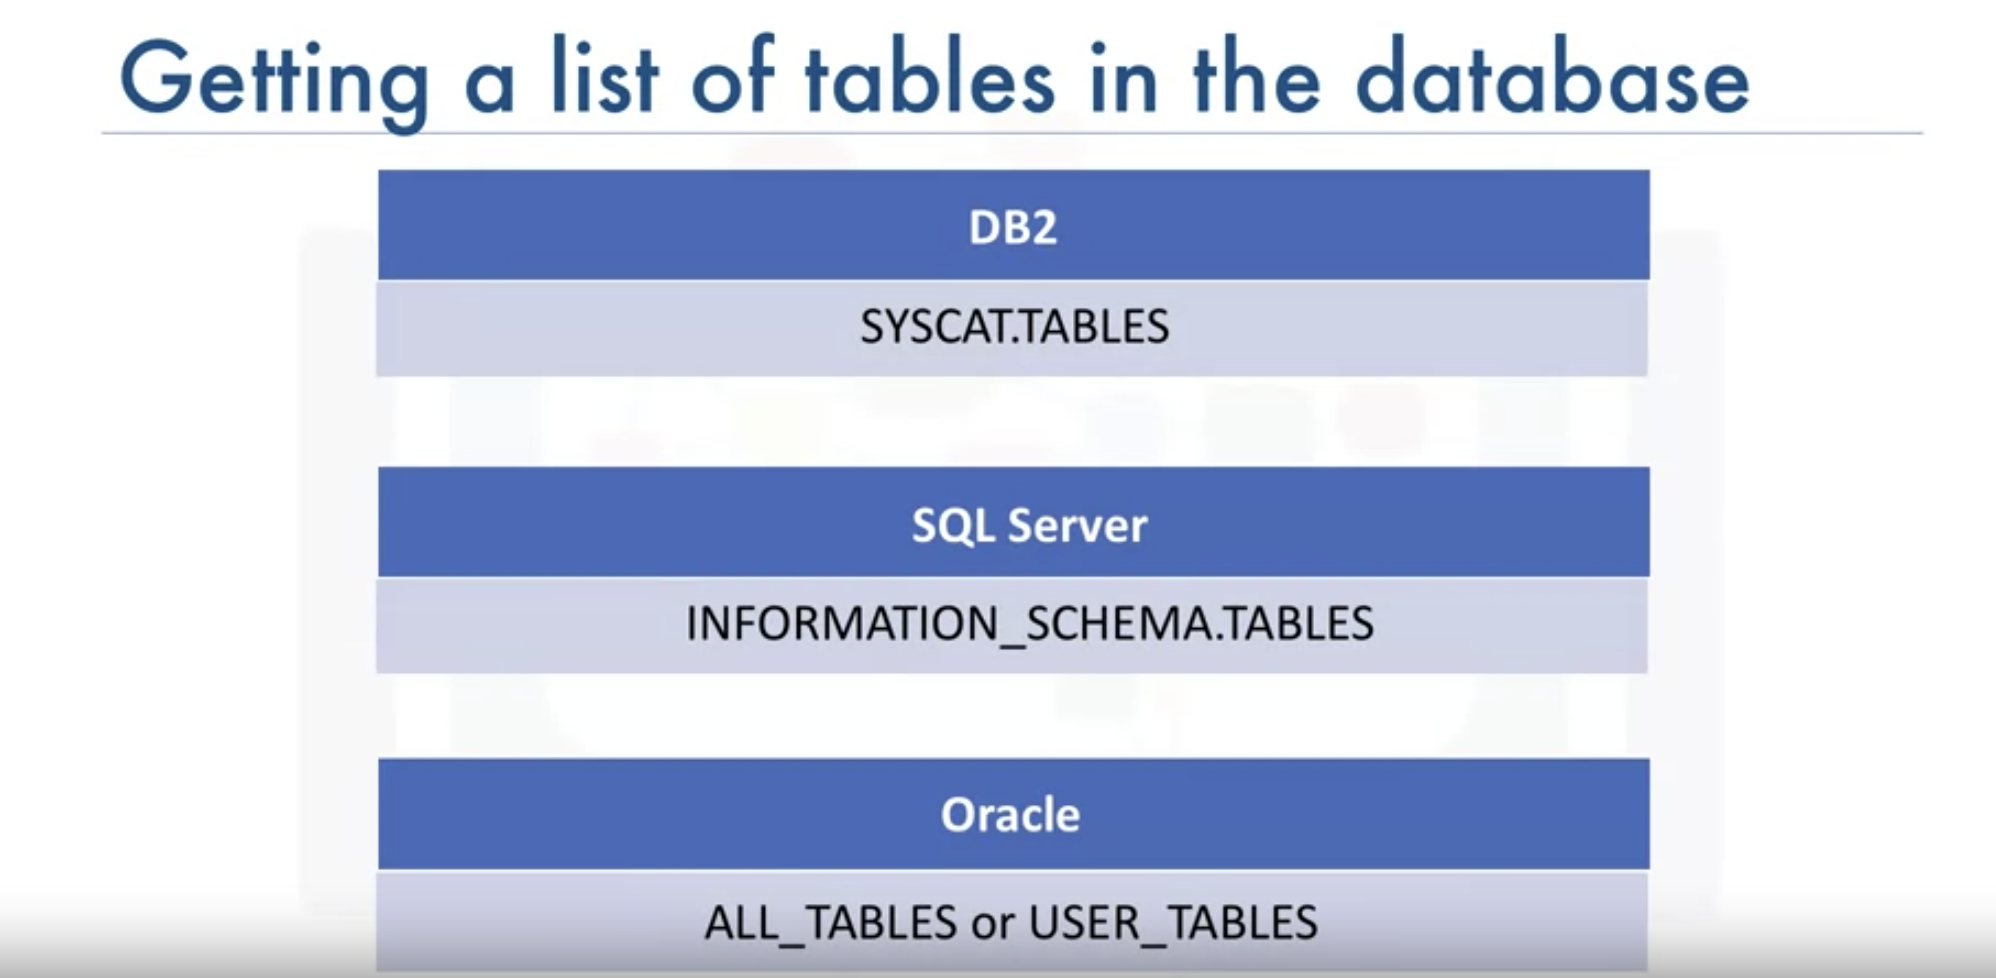

In [ ]:
# BUILT-IN FUNCTIONS

############ SUM(), MAX(), MIN(), AVG() ###########

#AVG
SELECT AVG(Cost/Quantity)  # Cost devided by Quantity
FROM Petrescue
WHERE Animal = 'Dog'


############ ROUND(), LENGTH(), UCASE(), LCASE() ###########


# DATE: YYYYMMDD
# TIME: HHMMSS
# TIMESTAMP: YYYYXXDDHHMMSSZZZZZZ # Z:MICROSECOND

############ YEAR(), MONTH(), DAY(), DAYOFMONTH(), DAYOFWEEK(), DAYOFYEAR(), WEEK(), HOUR(), MINUTE(), SECOND() ###########
############ CURRENT_DATE, CURRENT_TIME ###########

# Extract the DAY portion from a date::
SELECT DAY(Rescuedate)
FROM Petrescue
WHERE Animal = 'Cat'

# Get the number of rescues during the month of May:
SELECT COUNT(*)
FROM Petrescue
WHERE MONTH(Rescuedate) = '05'

# What date was it 3 days after each rescue date?
SELECT (Rescuedate + 3 DAYS)
FROM Petrescue

# How many days have passed since each rescuedate till now: (Result will be in YMMDD)
SELECT (CURRENT_DATE - Rescuedate)
FROM Petrescue

In [ ]:

 #################### Common issues with column names #######################

# if column name has mixed upper and lower case
# use ' ' to sepcify mixed case column name
SELECT 'Id' FROM DOGS

# by default spaces will get mapped to underscores in column nanme
# other speacial characters like parentheses or brackets may also get mapped to underscores
# use ' ' 
column A ---- Name of Dog

SELECT 'NAME_OF_DOG' FROM DOGS


# use \ as the escape character in cases where the query contains single quotes in python notebook:
SELECTQUERY = 'SELECT * FROM DOGS WHERE 'NAME_OF_DOG' = \'HUGGY\''

# use \ to split the query into multiple lines in python notebook:
%SQL SELECT 'ID', 'NAME_OF_DOG',\
    FROM DOGS\
    WHERE 'NAME_OF_DOG' = 'HUGGY'

In [ ]:
# SELECT 
SELECT * FROM Book
SELECT book_id, title, year FROM Book
SELECT <column 1>, <column 2> FROM Book


SELECT book_id, title FROM Book
WHERE book_id = 'B1'

SELECT book_id, title FROM Book
WHERE firstname LIKE 'R%'

SELECT book_id, title FROM Book
WHERE pages >= 90 AND pages <=120

SELECT book_id, title FROM Book
WHERE country IN ('AU','BR')

SELECT * FROM EMPLOYEES 
WHERE (SALARY BETWEEN 60000 AND 70000) AND DEP_ID = 5;

# FROM MULTIPLE TABLES
SELECT D.DEP_NAME, E.F_NAME, E.L_NAME 
FROM EMPLOYEES AS E, DEPARTMENTS AS D 
WHERE E.DEP_ID = D.DEPT_ID_DEP 
ORDER BY D.DEP_NAME, E.L_NAME DESC;

# AVG
SELECT DEP_ID, COUNT(EMP_ID), AVG(SALARY) FROM EMPLOYEES GROUP BY DEP_ID;


In [ ]:
# sub-queries & nested SELECT

# aggregrate function cannot always used in WHERE clause directly, so we can:

SELECT emp_ID, f_name
FROM employees
WHERE salary < (SELECT AVG(salary) FROM employees)

SELECT emp_ID, salry, (SELECT AVG(salary) FROM employees) AS avg_salary
FROM employees

# DERIVED TABLES/ TABLE EXPRESSIONS 
SELECT * 
FROM (SELECT emp_ID, f_name FROM employees) AS emp4all

In [ ]:
# Multiple tables

SELECT * 
FROM employees
WHERE dep_id IN (SELECT dept_id_dep FROM departments WHERE loc_id = 'L2002')

SELECT *
FROM employees, departments 
WHERE empoyees.dep_id = departments.dept_id_dep

or 

SELECT E.emp_id, D.dep_id_dep  
FROM employees E, departments D
WHERE E.dep_id = D.dept_id_dep

In [ ]:
# AS for column name
SELECT Country, count(Country) 
AS Count 
FROM Author
GROUP BY Country

In [ ]:
# ORDER BY
SELECT book_id, title FROM Book
ORDER BY title

SELECT book_id, title FROM Book
ORDER BY title DESC

SELECT book_id, title FROM Book
ORDER BY 2   # indicating order by the 2nd column of the table

SELECT * FROM EMPLOYEES ORDER BY DEP_ID DESC, L_NAME DESC;

In [ ]:
# GROUP BY
SELECT Country, count(Country) 
FROM Author
GROUP BY Country

# WHERE is applied on the whole table while HAVING only on the 'GROUP BY' clause
SELECT Country, count(Country) 
AS Count 
FROM Author
GROUP BY Country
HAVING count(Country) > 4


SELECT DEP_ID, COUNT(*) AS "NUM_EMPLOYEES", AVG(SALARY) AS "AVG_SALARY"
FROM EMPLOYEES
GROUP BY DEP_ID
HAVING count(*) < 4    # CANNOT USE 'NUM_EMPLOYEES' HERE
ORDER BY AVG_SALARY;

In [ ]:
# COUNT, DISTINCT, LIMIT
SELECT COUNT(Country) FROM Medals WHERE Country = 'Canada'
SELECT COUNT(*) FROM FilmLocations
SELECT Country, count(Country) FROM Author


SELECT DISTINCT(Country) FROM Medals WHERE MedalType ='Gold'     # to get a list of unique values
SELECT COUNT(DISTINCT(Releaseyear)) FROM FilmLocations


SELECT * FROM Medals WHERE Year = 2018 LIMIT 10    # restrict the number of rows retrieved
SELECT * FROM FilmLocations LIMIT 15 OFFSET 10     # Retrieve the first 15 rows from table but starting from row 11

In [ ]:
# INSERT, UPDATE, DELETE
INSERT INTO Author
(Author_ID, Lastname, Firstname, Email, City, Country)
Values
('A1', 'Chong', 'Raul', 'rfc@ibm.com', 'Toronto', 'CA'),
('A3', 'Ling', 'Pun', 'Peter@hotmail.com', 'Kcp', 'CA')


UPDATE Author 
SET Lastname = 'Katta',
    Firstname = 'Lakshmi'
WHERE Author_ID ='A2'


DELETE FROM Author
WHERE Author_ID IN ('A2', 'A3')

In [ ]:
# CREATE
CREATE TABLE author (
    author_id CHAR(2) PRIMARY KEY NOT NULL,
    lastname VARCHAR(15) NOT NULL,
    firstname VARCHAR(15) NOT NULL,
    email VARCHAR(15) NOT NULL,
    city VARCHAR(15),
    country CHAR(2)
    )
    
#### CHAR: a character string of a fixed length
#### VARCHAR: a character string of a variable length



In [ ]:
# ALTER

- add or remove columns
- modify data type of columns
- add or remove keys
- add or remove constraints

ALTER TABLE author
    ADD COLUMN telephone_number BIGINT;
    
#### BIGINT: a data type that can hold up to 19 digits long

ALTER TABLE author
    ALTER COLUMN telephone_number SET DATA TYPE CHAR(20);
    
ALTER TABLE author
    ALTER COLUMN telephone_number TO Telephone_Number

ALTER TABLE PETSALE
    RENAME COLUMN PET TO ANIMAL; 
    
ALTER TABLE author
    DROP COLUMN telephone_number;
    
DROP TABLE author;

##### to remove all the rows in the table
TRUNCATE TABLE author
    IMMEDIATE;

In [ ]:
##################   VIEW     #####################

# ONLY the definition of the view is stored. not the data

CREATE VIEW <VIEW NAME> (<COLUMN_1>, <COLUMN_2>, ... )
AS SELECT <COLUMN_1>, <COLUMN_2> ...
FROM TABLE
WHERE ...


DROP VIEW <VIEW NAME>

! 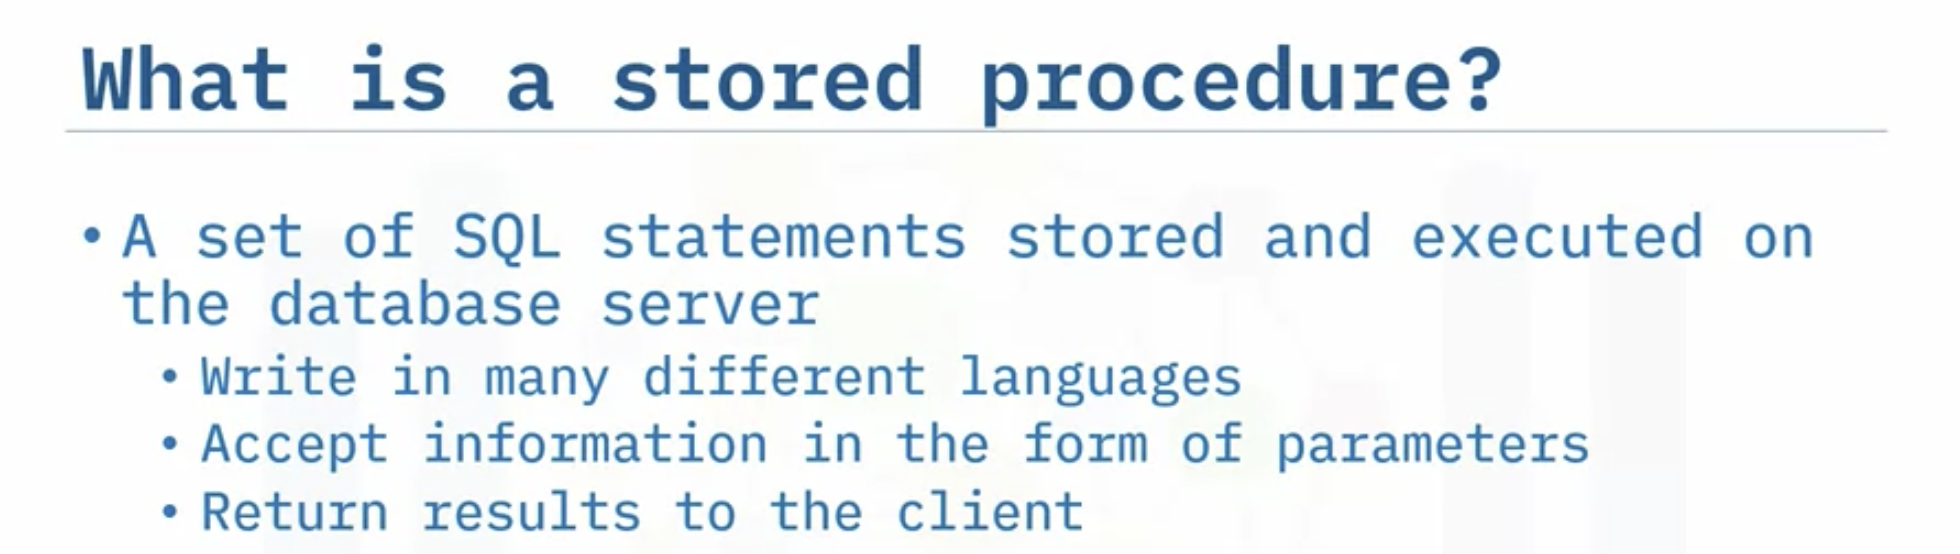
! 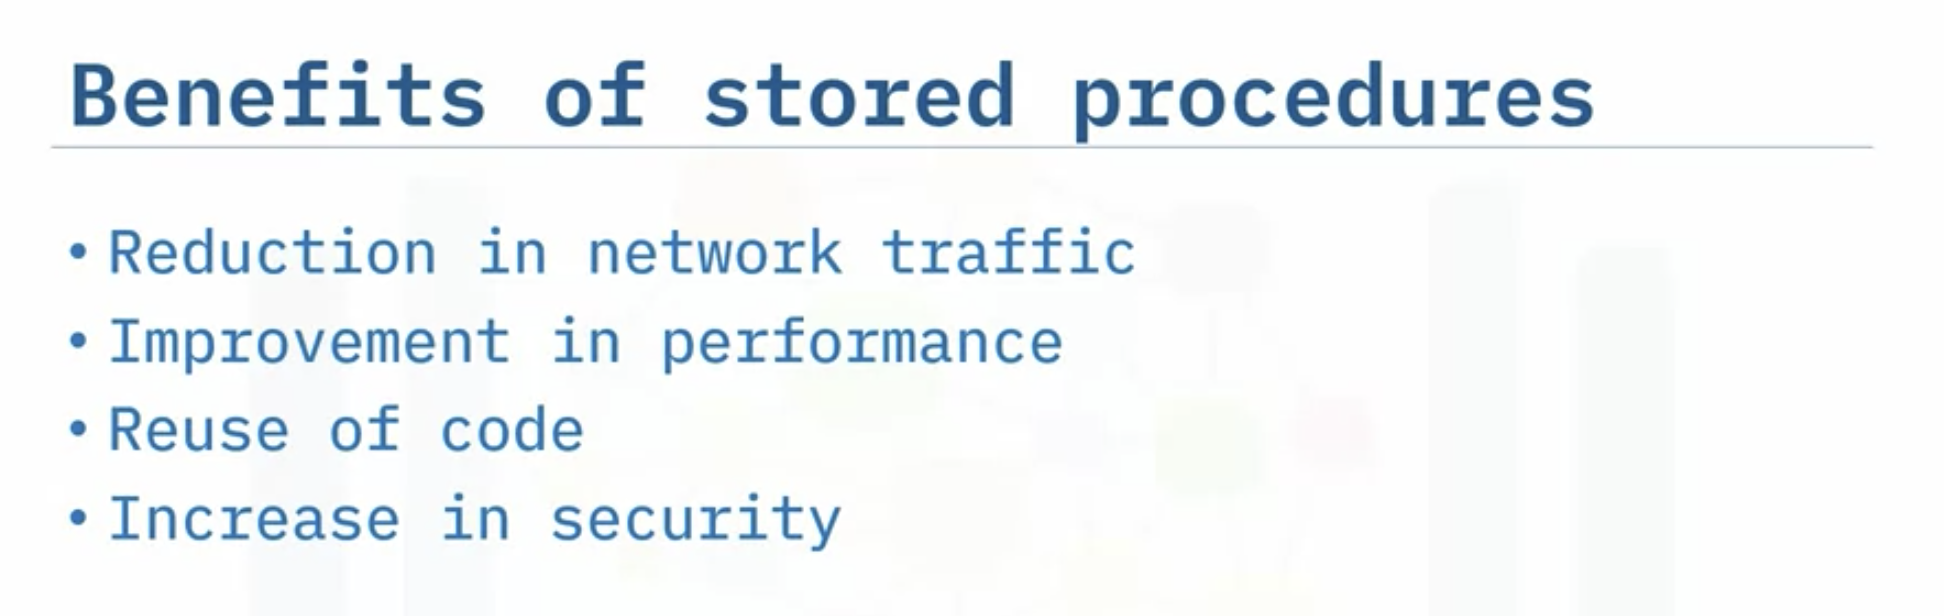

In [ ]:
##################.   Store Procedures     ##################

--#SET TERMINATOR @
CREATE PROCEDURE RETRIEVE_ALL       -- Name of this stored procedure routine

LANGUAGE SQL                        -- Language used in this routine 
READS SQL DATA                      -- This routine will only read data from the table

DYNAMIC RESULT SETS 1               -- Maximum possible number of result-sets to be returned to the caller query

BEGIN 

    DECLARE C1 CURSOR               -- CURSOR C1 will handle the result-set by retrieving records row by row from the table
    WITH RETURN FOR                 -- This routine will return retrieved records as a result-set to the caller query
    
    SELECT * FROM PETSALE;          -- Query to retrieve all the records from the table
    
    OPEN C1;                        -- Keeping the CURSOR C1 open so that result-set can be returned to the caller query

END
@                                   -- Routine termination character



CALL RETRIEVE_ALL;      -- Caller query



DROP PROCEDURE RETRIEVE_ALL;


In [ ]:
--#SET TERMINATOR @
CREATE PROCEDURE UPDATE_SALEPRICE ( 
    IN Animal_ID INTEGER, IN Animal_Health VARCHAR(5) )     -- ( { IN/OUT type } { parameter-name } { data-type }, ... )

LANGUAGE SQL                                                -- Language used in this routine
MODIFIES SQL DATA                                           -- This routine will only write/modify data in the table

BEGIN 

    IF Animal_Health = 'BAD' THEN                           -- Start of conditional statement
        UPDATE PETSALE
        SET SALEPRICE = SALEPRICE - (SALEPRICE * 0.25)
        WHERE ID = Animal_ID;
    
    ELSEIF Animal_Health = 'WORSE' THEN
        UPDATE PETSALE
        SET SALEPRICE = SALEPRICE - (SALEPRICE * 0.5)
        WHERE ID = Animal_ID;
        
    ELSE
        UPDATE PETSALE
        SET SALEPRICE = SALEPRICE
        WHERE ID = Animal_ID;

    END IF;                                                 -- End of conditional statement
    
END
@                                                           -- Routine termination character


CALL UPDATE_SALEPRICE(1, 'BAD');        -- Caller query


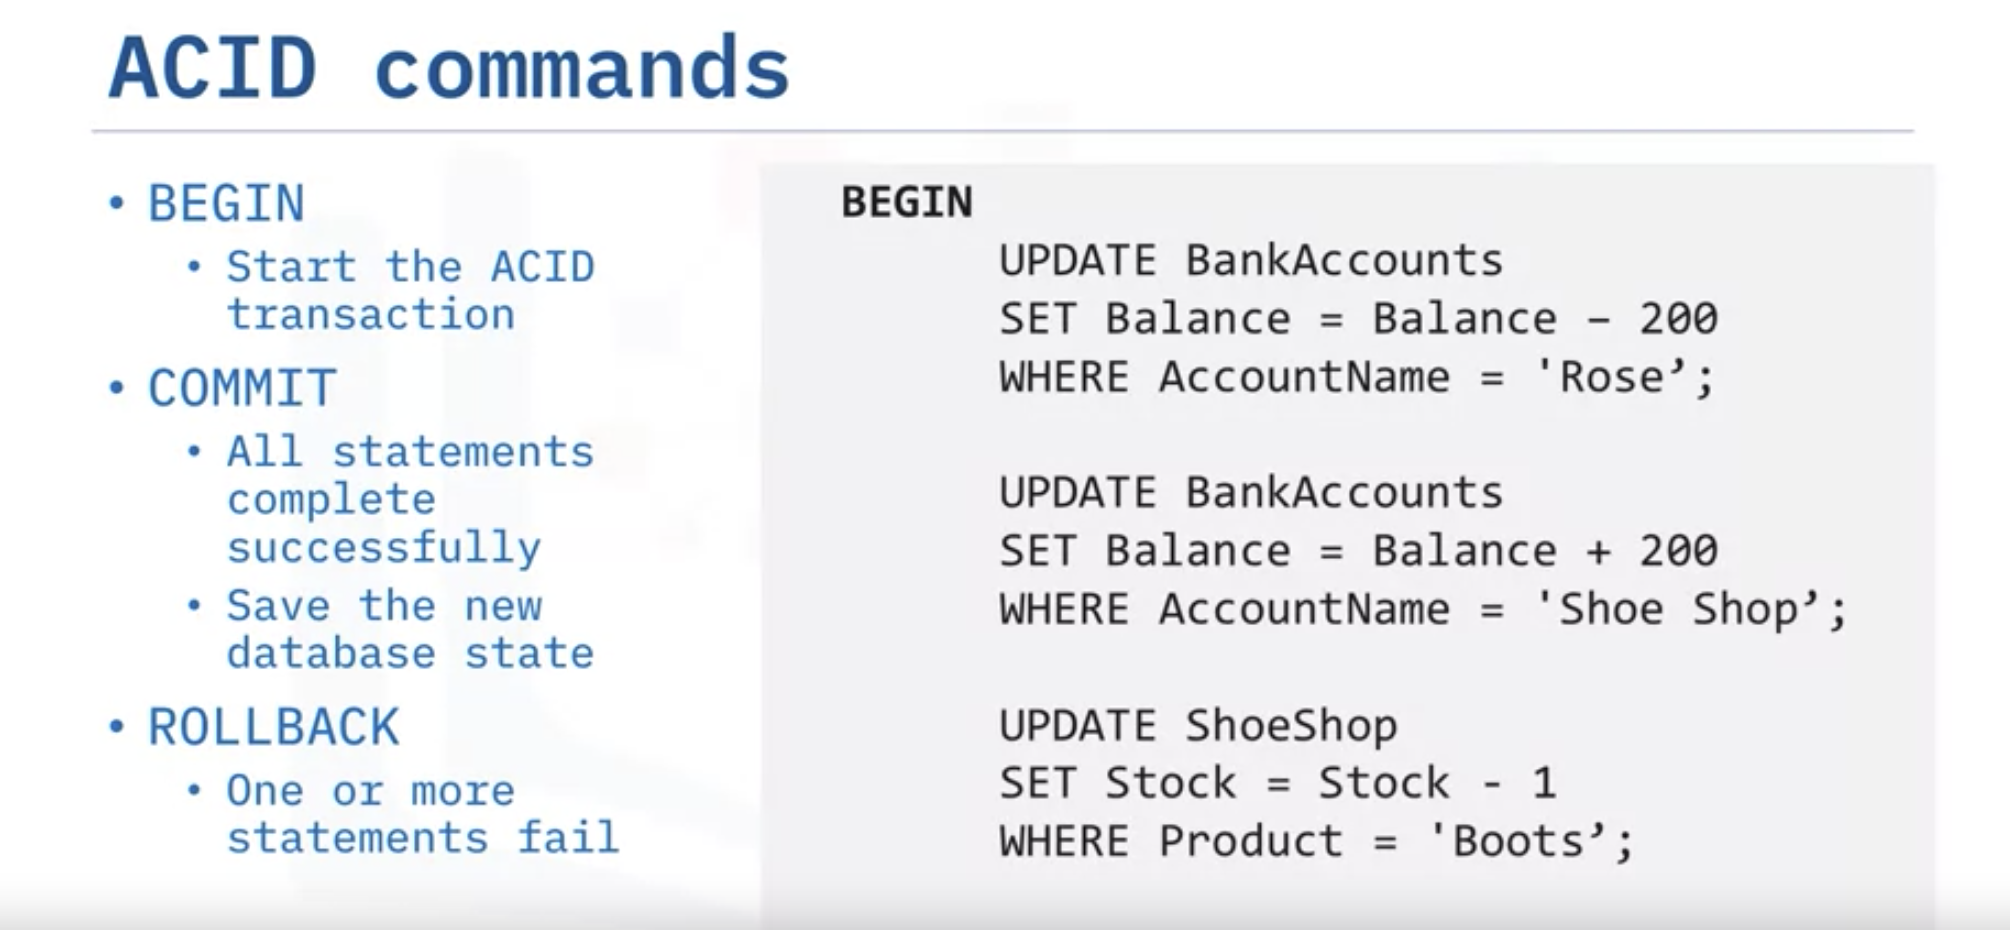

In [ ]:
##################### ACID transactions

--#SET TERMINATOR @
CREATE PROCEDURE TRANSACTION_JAMES                          -- Name of this stored procedure routine

LANGUAGE SQL                                                -- Language used in this routine 
MODIFIES SQL DATA                                           -- This routine will only write/modify data in the table

BEGIN

        DECLARE SQLCODE INTEGER DEFAULT 0;                  -- Host variable SQLCODE declared and assigned 0
        DECLARE retcode INTEGER DEFAULT 0;                  -- Local variable retcode with declared and assigned 0
        DECLARE CONTINUE HANDLER FOR SQLEXCEPTION           -- Handler tell the routine what to do when an error or warning occurs
        SET retcode = SQLCODE;                              -- Value of SQLCODE assigned to local variable retcode
        
        UPDATE BankAccounts
        SET Balance = Balance-1200
        WHERE AccountName = 'James';
        
        UPDATE BankAccounts
        SET Balance = Balance+1200
        WHERE AccountName = 'Shoe Shop';
        
        UPDATE ShoeShop
        SET Stock = Stock-4
        WHERE Product = 'Trainers';
        
        UPDATE BankAccounts
        SET Balance = Balance-150
        WHERE AccountName = 'James';

        
        IF retcode < 0 THEN                                  --  SQLCODE returns negative value for error, zero for success, positive value for warning
            ROLLBACK WORK;
        
        ELSE
            COMMIT WORK;
        
        END IF;
        
END
@   

In [ ]:
--#SET TERMINATOR @
CREATE PROCEDURE TRANSACTION_ROSE                           -- Name of this stored procedure routine

LANGUAGE SQL                                                -- Language used in this routine 
MODIFIES SQL DATA                                           -- This routine will only write/modify data in the table

BEGIN

        DECLARE SQLCODE INTEGER DEFAULT 0;                  -- Host variable SQLCODE declared and assigned 0
        DECLARE retcode INTEGER DEFAULT 0;                  -- Local variable retcode with declared and assigned 0
        DECLARE CONTINUE HANDLER FOR SQLEXCEPTION           -- Handler tell the routine what to do when an error or warning occurs
        SET retcode = SQLCODE;                              -- Value of SQLCODE assigned to local variable retcode
        
        UPDATE BankAccounts
        SET Balance = Balance-200
        WHERE AccountName = 'Rose';
        
        UPDATE BankAccounts
        SET Balance = Balance+200
        WHERE AccountName = 'Shoe Shop';
        
        UPDATE ShoeShop
        SET Stock = Stock-1
        WHERE Product = 'Boots';
        
        UPDATE BankAccounts
        SET Balance = Balance-300
        WHERE AccountName = 'Rose';

        
        IF retcode < 0 THEN                                  --  SQLCODE returns negative value for error, zero for success, positive value for warning
            ROLLBACK WORK;
        
        ELSE
            COMMIT WORK;
        
        END IF;
        
END
@ 

# UDEMY

In [ ]:
-- FOR COMMENTING

In [ ]:
SELECT *
FROM EMPLOYEES
WHERE DEPARTMENT IS NULL


In [ ]:
SELECT *
FROM EMPLOYEES
WHERE NOT DEPARTMENT = 'SPORTS' (OR !=, <>)


SELECT *
FROM EMPLOYEES
WHERE DEPARTMENT = 'SPORTS'
OR DEPARTMENT = 'FIRST AID'

In [ ]:
SELECT *
FROM EMPLOYEES
WHERE DEPARTMENT IN ('SPORTS','FIRST AID')

SELECT *
FROM EMPLOYEES
WHERE DEPARTMENT NOT IN ('SPORTS','FIRST AID')

In [ ]:
SELECT *
FROM EMPLOYEES
WHERE SALARY BETWEEN 6000 AND 10000

SELECT *
FROM EMPLOYEES
WHERE DATE BETWEEN '2002-01-01' AND '2002-01-31'

In [ ]:
SELECT FIRST NAME
FROM EMPLOYEES 
WHERE SARALY > 10000
OR (DEPARTMENT = 'SPORTS' AND GENDER = 'M')

In [ ]:
### FOR COLUMN NAME WITH SPACE, USE "" INSTEAD OF ''

In [ ]:
SELECT DISTINCT DEPARTMENT AS "SORTED_DEPARTMENTS" (SET COLUMN NAME)
FROM EMPLOYEES
WHERE ...
ORDER BY EMPLOYEE_ID DESC
LIMIT 10                                          (TO SEE THE TOP 10 RECORD)


In [ ]:
SELECT UPPER(FIRST_NAME), LOWER(DEPARTMENT)
FROM EMPLOYEES

In [ ]:
SELECT TRIM('    HELLO    ')           (REMOVE BLANK SPACE)

SELECT LENGTH(TRIM('    HELLO    '))   (GET THE LENGTH)

In [ ]:
SELECT FIRST_NAME ||''|| LAST_NAME AS FULL_NAME   (CONCAT TWO COLUMNS)
FROM EMPLOYEES

SELECT DEPARTMENT, DEPARTMENT || 'DEPARTMENT' (E.X. 'DEVICE DEPARTMENT')
FROM EMPLOYEES

In [ ]:
# (CREATE A BOOLEAN COLUMN SHOWING IF THE CONDITION IS MET)

SELECT FIRST NAME, (SALARY > 14000) AS IS_OVER_14K 
FROM EMPLOYEES

SELECT DEPARTMENT, ('ALEX' IN (DEPARTMENT, FIRST_NAME))
FROM EMPLOYEES

SELECT DEPARTMENT, (DEPARTMENT LIKE '%TH%')
FROM EMPLOYEES

In [ ]:
# SUBSTRING

SELECT SUBSTRING('THIS IS TEST DATA' FROM 1 FOR 4) # FROM POSITION 1 FOR 4 CHARACTERS

# REPLACE

SELECT DEPARTMENT, REPLACE(DEPARTMENT, 'CLOTHING', 'WEAR') MODIFIED_DATA #(COLUMN, 'OLD DATA', 'NEW DATA')
FROM DEPARTMENTS

# POSITION
SELECT POSITION('@' IN EMAIL)
FROM DEPARTMENTS


##### SUBSTRING AND POSITION
SELECT SUBSTRING(EMAIL, POSITION('@' IN EMAIL)) (E.X. @HOTMAIL.COM)
FROM DEPARTMENTS


In [ ]:
# CASE

SELECT FIRST_NAME, SALARY,
CASE
    WHEN SALARY < 10000 THEN 'UNDER PAID'
    WHEN SALARY > 100000 AND SALARY < 110000 THEN 'PAID WELL'
    ELSE 'UNPAID'
END AS CATEGORY
FROM EMPLOYEES
ORDER BY SALARY DESC



SELECT SUM(CASE WHEN SALARY < 10000 THEN 1 ELSE 0 END) AS UNDER_PAID,
SUM(CASE WHEN SALARY > 10000 AND SALARY < 15000 THEN 1 ELSE 0 END) AS PAID_WELL,
FROM EMPLOYEES


# TRANSPOSE DATA USING CASE CLAUSE

SELECT FIRST_NAME
CASE WHEN REGION = 1 THEN (SELECT COUNTRY FROM REGION WHERE REGION = 1) END REGION_1,
CASE WHEN REGION = 2 THEN (SELECT COUNTRY FROM REGION WHERE REGION = 2) END REGION_2
...
FROM EMPLOYEES



SELECT COUNT(A.REGION_1)+COUNT(A.REGION_2) AS USA,
COUNT(A.REGION_3) + COUNT(A.REGION_4) AS AU
FROM
(SELECT FIRST_NAME
CASE WHEN REGION = 1 THEN (SELECT COUNTRY FROM REGION WHERE REGION = 1) END REGION_1,
CASE WHEN REGION = 2 THEN (SELECT COUNTRY FROM REGION WHERE REGION = 2) END REGION_2,
CASE WHEN REGION = 3 THEN (SELECT COUNTRY FROM REGION WHERE REGION = 3) END REGION_3,
CASE WHEN REGION = 4 THEN (SELECT COUNTRY FROM REGION WHERE REGION = 4) END REGION_4
FROM EMPLOYEES) A

In [ ]:
# CORRELATED SUBQUERIES

# FOR EACH OUTER RECORD, THE INNER CLAUSE WILL RUN TO MAKE SURE CONDITION MET 
# IF THE PEOPLE FROM E1 THAT HAS REGION = USA, THEN THE INNER CLAUSE WILL GIVE
# THE AVG SALARY FOR ALL RECORDS FROM USA IN E2
SELECT FIRST_NAME, SALARY
FROM EMPLOYEE E1
WHERE SALARY > (SELECT ROUND(AVG(SALARY))
                FROM EMPLOYEE E2
                WHERE E1.REGION = E2.REGION)


SELECT FIRST_NAME, DEPARTMENT, SALARY, 
(SELECT ROUND(AVG(SALARY)) FROM EMPLOYEE E2 WHERE E1.DEPARTMENT = E2.DEPARTMENT) AS AVG_DEPART_SALARY
FROM EMPLOYEE E1





